# Introduction to Scipy
Data analysis needs effective computational ressources to read/write and process data. Usually, the data set to be processed is a set of arrays. [Scipy](https://www.scipy.org/) (*Scientific Python*) package is a dedicated tool to operate on array efficiently. Quoting the *FAQ*, Scipy is "*set of open source (BSD licensed) scientific and numerical tools for Python. It currently supports special functions, integration, ordinary differential equation (ODE) solvers, gradient optimization, parallel programming tools, an expression-to-C++ compiler for fast execution, and others. A good rule of thumb is that if it’s covered in a general textbook on numerical computing (for example, the well-known Numerical Recipes series), it’s probably implemented in scipy*". This is the core of any data analysis package in Python.

The main structure provides by Scipy is the *Fixed-Type Arrays*: **ndarray**. It is an efficient way of storing data and processing them.

In [30]:
# Find the scipy module and define an alias in the local namespace
import scipy as sp

In [31]:
A = sp.array(range(10)) # Create array from a list
print("A = {}".format(A)) # note that there is 10 elements: 0,1,...,9
B = sp.arange(10) # Create array from scratch
print("B = {}".format(B))
sp.array?

A = [0 1 2 3 4 5 6 7 8 9]
B = [0 1 2 3 4 5 6 7 8 9]


There are plenty of functions to create and to initialize specific array (sp.zeros, sp.ones, sp.empty ...). For each case, it is possible to define the type (int8, uint8, float64 ...) by providing the corresponding parameter. More information regarding the different array types can be found here: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html and https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.dtypes.html.

## Basics of Arrays 
### Getting attributes

In [2]:
# Attributes
print("Number of elements in A: {}".format(A.size))
print("Number of dimension of A: {}".format(A.ndim))
print("Dimension of A: {}".format(A.shape))
print("Type of element in A: {}".format(A.dtype))

Number of elements in A: 10
Number of dimension of A: 1
Dimension of A: (10,)
Type of element in A: int64


It is possible to modify explicitely some attributes, in particlar the *shape*:

In [4]:
B.shape = (2,5) # Change the shape to two lines, 5 columns -> the number of total elements should be the same
print("B = \n {}".format(B))
C = B.reshape(10) # The function return a new array with the corresponding shape
print(B.shape)
print(C.shape)

B = 
 [[0 1 2 3 4]
 [5 6 7 8 9]]
(2, 5)
(10,)


### Accessing elements

In [4]:
print("A = {}".format(A))
print(A[0]) # First element
print(A[1]) # Second element
print(A[-1]) # Last element
print(A[-2]) # Antepenultimate element

A = [0 1 2 3 4 5 6 7 8 9]
0
1
9
8


In [5]:
# Some slicing
print(A[0:3]) # Return an array of elements of A from the first (index 0) to the third (index 2)
print(A[::2]) # All elements with a step of 2
print(A[-3:-1]) # Can use reverse order

[0 1 2]
[0 2 4 6 8]
[7 8]


## Computation on Array
### Universal functions
A general comment for interpreted laguage: **do not use loop if you can** ! It is slow and inefficient.

The comment apply here with Python. Scipy provide a large types of operation that are optimized to work on array directly (as in Matlab, R ...). In particular, *universal functions* (ufuncs) are a set of functions for fast element-wise operations (+, -, power ...). Let see a short example:

In [9]:
def my_add(M,N): # Suppose that A and B have the same shape
    P = sp.empty_like(M)
    nl, nr = M.shape
    for i in range(nl):
        for j in range(nr):
            P[i,j] = M[i,j] + N[i,j]
    return P

M, N = sp.arange(100000).reshape(1000,100), sp.arange(100000).reshape(1000,100)

# Evaluate execution time by repeating several runs based on a total of 2 seconds execution window
print('using loops')
%timeit my_add(M,N) # using loops
print('using ufuncs')
%timeit M + N # using ufuncs equivalent to sp.add(A,B)

using loops
67.9 ms ± 1.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
using ufuncs
119 µs ± 1.23 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Most all conventional functions exist: arithmetic, trigonometric, log/exp ... A detailed list is available here: https://docs.scipy.org/doc/numpy-1.13.0/reference/ufuncs.html

### Reduction
Scipy provides a set of functions to extrac values from the array itself and for some specific dimension of the array

In [13]:
A = sp.random.rand(5,4)
print("A = \n{}".format(A))
print(A.sum()) # Sum over all element
print(A.sum(axis=0)) # Sum over the lines: return an array of values
print(A.sum(axis=1)) # over the columns

A = 
[[0.8001427  0.25118274 0.50996884 0.57381743]
 [0.65804657 0.10278979 0.6421569  0.36450736]
 [0.18532431 0.45765794 0.64012398 0.08901897]
 [0.76709212 0.85178731 0.58280092 0.15475311]
 [0.68783793 0.52228771 0.10202279 0.18330878]]
9.12662818473456
[3.09844362 2.18570549 2.47707343 1.36540565]
[2.1351117  1.76750062 1.37212521 2.35643345 1.49545721]


Using the same convention, it is possible to get the cumulative sum (cumsum), product of element (prod, cumprod), the maximum/minimum value (max, min) and their position (argmax, argmin) and the first and second statistical moment (mean, var/std). It is also possible to check if a condition is fullfilled for all or any elements of the array.

In [14]:
sp.any(A>0)

True

In [15]:
sp.all(A>0.5)

False

### Some exercices
- Find the maximum and minimum value of A
- Find the maximum of each line
- Find the mean value of each row
- Find the position of the minimum value of each row

In [16]:
print(A.max())
print(A.min())
print(A.max(axis=0))
print(A.mean(axis=1))
print(A.argmin(axis=1))

0.8517873097009285
0.08901897386167201
[0.8001427  0.85178731 0.6421569  0.57381743]
[0.53377792 0.44187515 0.3430313  0.58910836 0.3738643 ]
[1 1 3 3 2]


### Broadcasting
Broadcasting allow to define efficient operations between arrays of different sizes, given some of them are compatible. An extreme example is adding a scalar to a matrix

In [13]:
A+3

array([[ 3.82995255,  3.33756315,  3.50730096,  3.8505329 ],
       [ 3.23808478,  3.3261701 ,  3.79225417,  3.92755043],
       [ 3.23140672,  3.36314079,  3.83403677,  3.34594983],
       [ 3.20428516,  3.12861753,  3.6228    ,  3.74528301],
       [ 3.0292502 ,  3.02041209,  3.24991261,  3.10990377]])

Easy ? Now if I need to center the data, it is also super easy

In [27]:
print('Size of A: {}'.format(A.shape))
print('Size of the average of A along the lines: {}'.format(A.mean(axis=0).shape))
# Suppose that each line is a sample, and each column a measurement (i.e., a variable)
Ac= A - A.mean(axis=0) 
print('Size of centered A: {}'.format(Ac.shape))
print ('Ac=\n{}'.format(Ac))

Size of A: (5, 4)
Size of the average of A along the lines: (4,)
Size of centered A: (5, 4)
Ac=
[[ 0.18045397 -0.18595836  0.01455415  0.3007363 ]
 [ 0.03835784 -0.33435131  0.14674222  0.09142623]
 [-0.43436442  0.02051684  0.1447093  -0.18406216]
 [ 0.14740339  0.41464621  0.08738623 -0.11832802]
 [ 0.06814921  0.08514661 -0.39339189 -0.08977235]]


If we need to standardize the data (substract the mean and divide by the standard deviation), it can be achieved easily:

In [28]:
As = (A-A.mean(axis=0))/A.std(axis=0)
print(As)

[[ 0.80850455 -0.72829853  0.07186391  1.70949873]
 [ 0.17185817 -1.30947366  0.72456782  0.51970125]
 [-1.94612291  0.08035341  0.71452988 -1.04627883]
 [ 0.66042501  1.62394546  0.43148626 -0.67262118]
 [ 0.30533518  0.33347332 -1.94244787 -0.51029998]]


More details about broadcasting can be found here: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html

## Ploting in Python
The package [Matplotlib](https://matplotlib.org/) offers several functions to plot data. Below an example using 2D data, more complicated plots can be constructed when needed.

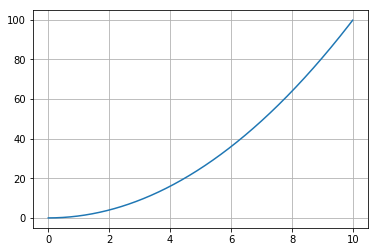

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
x = sp.arange(0,10,0.01)
y = x**2
plt.plot(x,y)
plt.grid()
plt.show()